<a href="https://colab.research.google.com/github/opmuyes/opmuyes/blob/Assignment/AssignmentV1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import pandas as pd
import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform = transforms.Compose(
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
)
data_info = pd.read_csv('/content/drive/MyDrive/Monkey/monkey_labels.txt')
train_dir = '/content/drive/MyDrive/Monkey/training'
test_dir = '/content/drive/MyDrive/Monkey/validation'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

In [ ]:
labels = list(data_info['Label'])
class_names = list(data_info[' Common Name                   '])
class_names

[' mantled_howler                ',
 ' patas_monkey                  ',
 ' bald_uakari                   ',
 ' japanese_macaque              ',
 ' pygmy_marmoset                ',
 ' white_headed_capuchin         ',
 ' silvery_marmoset              ',
 ' common_squirrel_monkey        ',
 ' black_headed_night_monkey     ',
 ' nilgiri_langur                ']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)


In [ ]:
model_pretrained = models.squeezenet1_0(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 52.2MB/s]


In [ ]:
model_pretrained

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [ ]:
!pip install torchinfo

from torchinfo import summary

summary(model= model_pretrained)

Layer (type:depth-idx)                   Param #
SqueezeNet                               --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       14,208
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Fire: 2-4                         --
│    │    └─Conv2d: 3-1                  1,552
│    │    └─ReLU: 3-2                    --
│    │    └─Conv2d: 3-3                  1,088
│    │    └─ReLU: 3-4                    --
│    │    └─Conv2d: 3-5                  9,280
│    │    └─ReLU: 3-6                    --
│    └─Fire: 2-5                         --
│    │    └─Conv2d: 3-7                  2,064
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  1,088
│    │    └─ReLU: 3-10                   --
│    │    └─Conv2d: 3-11                 9,280
│    │    └─ReLU: 3-12                   --
│    └─Fire: 2-6                         --
│    │    └─Conv2d: 3-13                 4,128
│ 

In [ ]:
model_pretrained.classifier[1] = nn.Conv2d(512, 2, kernel_size=(1, 1), stride=(1, 1))
# Conv2d(512, 2, kernel_size=(1, 1), stride=(1, 1))

In [ ]:
model_pretrained

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [ ]:
model_pretrained.to('cuda')

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [ ]:
# cross-entropy loss
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_pretrained.parameters(),lr=0.001,momentum=0.9)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history



In [ ]:
num_epochs = 10
trained_CNNmodel, history = train_and_validate(model_pretrained,loss_fn,optimizer,
                                            train_dataloader,test_dataloader,
                                            num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.0042, Accuracy: 99.7265%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 361.8193s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 46.7771s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 41.6104s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 41.4517s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 41.6659s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 42.1261s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.0000, Accuracy: 100.0000%, 
		Validation : Loss : 0.0000, Accuracy: 100.0000%, Time: 41.7800s
Epoch: 8/10
Epoch : 007, Training: Loss: 

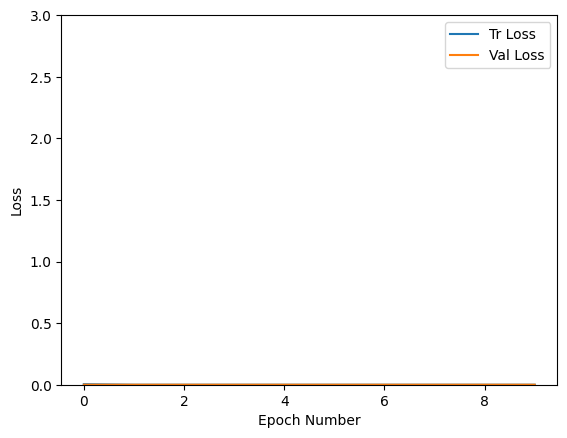

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

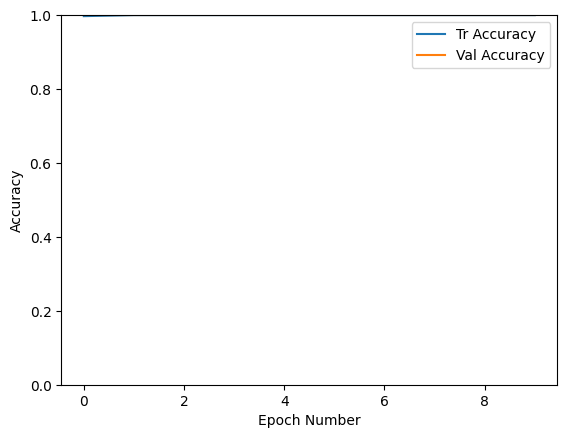

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sn
# import pandas as pd

# def plot_confusionMatrix(model_pretrained, test_dataloader):

#   y_pred = []
#   y_true = []

#   model_pretrained.to('cpu')

#   # iterate over test data
#   for inputs, labels in test_dataloader:
#           output = model_pretrained(inputs) # Feed Network

#           output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
#           y_pred.extend(output) # Save Prediction

#           labels = labels.data.cpu().numpy()
#           y_true.extend(labels) # Save Truth

#   # Build confusion matrix
#   cf_matrix = confusion_matrix(y_true, y_pred)
#   df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in class_names],
#                       columns = [i for i in class_names])
#   # plt.figure(figsize = (20,10))
#   sn.heatmap(df_cm, annot=True)
#   # plt.savefig('output.png')

# plot_confusionMatrix(model_pretrained, test_dataloader)
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import torch

def plot_confusionMatrix(model_pretrained, test_dataloader, class_names):
    y_pred = []
    y_true = []

    model_pretrained.to('cpu')

    # iterate over test data
    for inputs, labels in test_dataloader:
        output = model_pretrained(inputs)  # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output)  # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels)  # Save Truth

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

    # Normalize the confusion matrix
    df_cm = df_cm / df_cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    sn.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues")
